Zomato Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [2]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.1 MB 2.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 3.4 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.4 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.7 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 3.6 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("Zomato data .csv")

In [10]:
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
30,Redberrys,Yes,No,4.0/5,219,600,Cafes
27,Sea Green Cafe,No,No,3.3/5,4,500,Cafes
137,Hotel Andhra Speices,No,No,2.9/5,0,250,Dining
118,Kannadigas Karavali,No,No,3.4/5,0,250,Dining
78,Kolbeh,No,No,3.7/5,22,500,Dining


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
#Checked for any null values

df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [16]:
#Removing the denominator from the rate column to make it simpler, by creating a function

def handleRate(value):
    value=str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of Restaurants')

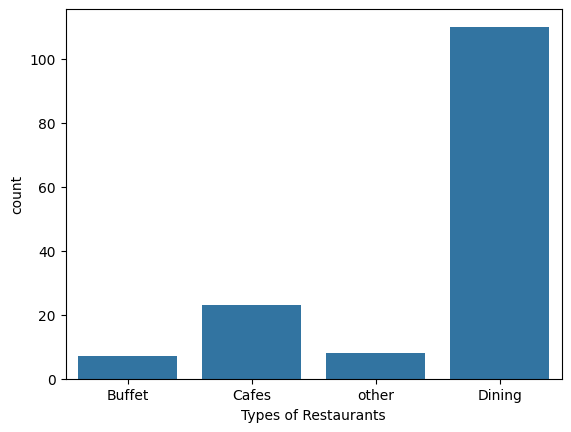

In [18]:
sns.countplot(x=df['listed_in(type)'])
mp.xlabel('Types of Restaurants')

## It seems like Majority of Customers Order from Dining type of restaurant

In [29]:
df.groupby('listed_in(type)').agg({'votes' : 'sum'})

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

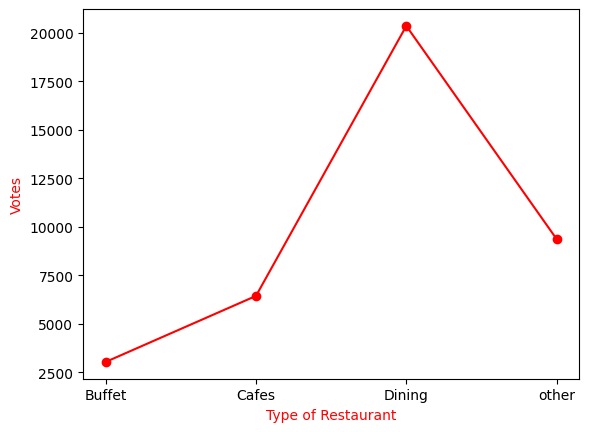

In [28]:
# The following graphs denote the number of votes for each type of restaurant.

am = df.groupby('listed_in(type)').agg({'votes' : 'sum'})

mp.plot(am, c='red', marker='o')
mp.xlabel('Type of Restaurant', c='red', size=10)
mp.ylabel('Votes', c='red', size=10)

## The restaurants coming under the dining category has the highest count of votes!

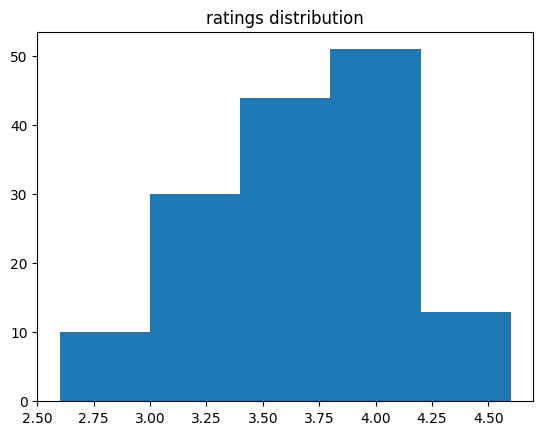

In [31]:
mp.hist(df['rate'], bins = 5)
mp.title('ratings distribution')
mp.show()

## The majority of restaurants have received ratings from 3.5 to 4

Text(0.5, 0, 'Average Order Spending for two people')

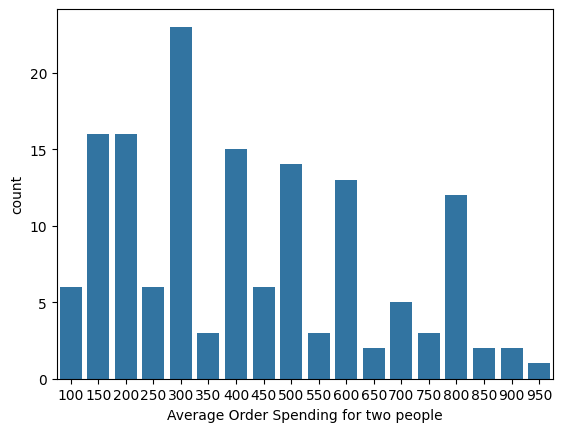

In [34]:
sns.countplot(x=df['approx_cost(for two people)'])
mp.xlabel('Average Order Spending for two people')

## Majority of couples prefer restaurants with an approximate cost of 300 Rs.

In [38]:
df.groupby('online_order').agg({'rate' : 'max'})



,rate
online_order,
No,4.3
Yes,4.6


<Axes: xlabel='online_order', ylabel='rate'>

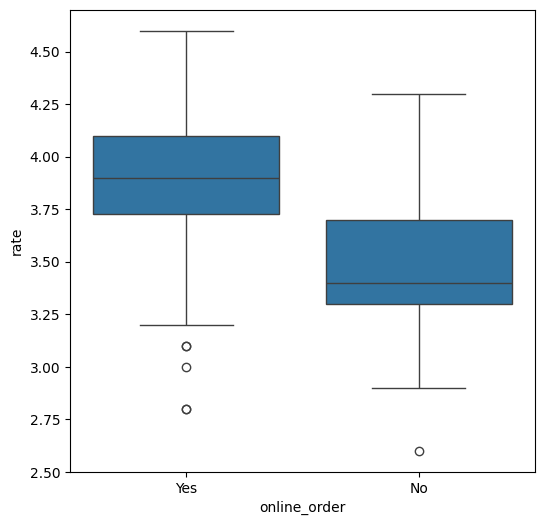

In [39]:
mp.figure(figsize = (6,6))

sns.boxplot(x = 'online_order', y = 'rate', data = df)

## Offline order received lower rating as compared to online orders

In [40]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


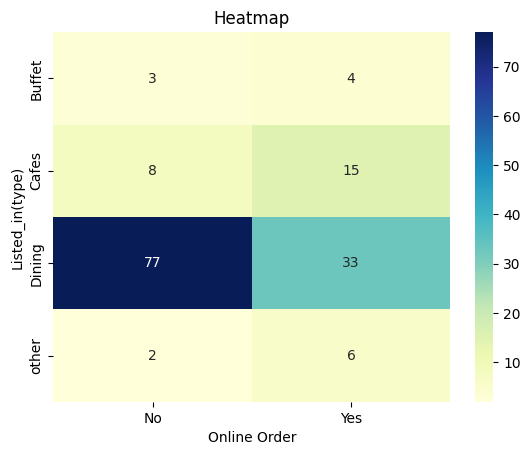

In [41]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt= 'd')
mp.title('Heatmap')
mp.xlabel('Online Order')
mp.ylabel('Listed_in(type)')
mp.show()

## Dining Restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at restaurants,but prefer online ordering at cafes.

# CLASSIFICATION ANALYSIS

In [43]:
df.sample(15)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
58,Five Star Chicken,No,No,3.6/5,55,200,Dining
136,Sri Sai Tiffannies,No,No,3.3/5,0,150,Dining
129,Sri Basaveshwar Jolada Rotti Oota,No,No,3.4/5,0,150,Dining
142,Gawdaru Mane Beriyani,No,No,3.3/5,0,300,Dining
125,Soms Kitchen & Bakes,No,No,2.9/5,0,400,Dining
138,Sri Murari Family Restaurant,No,No,2.9/5,0,250,Dining
140,Darkolates,No,No,3.3/5,0,200,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
126,Banashankari Nati Style,No,No,2.9/5,0,350,Dining
18,T3H Cafe,No,No,3.9/5,93,300,Cafes


In [37]:
#For classification analysis I've chosen the 'listed_in(type)' column as the target variable and the rest of the columns as feature variables.

X = df.drop('listed_in(type)', axis=1)  # Features
y = df['listed_in(type)']             # Target variable

In [14]:
# Convert 'online_order' and 'book_table' to numerical
X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})
X['book_table'] = X['book_table'].map({'Yes': 1, 'No': 0})

In [15]:
# Split 'rate' into a numerical value
X['rate'] = X['rate'].str.split('/').str[0].astype(float)

In [23]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train = X_train.drop('name', axis=1)
X_test = X_test.drop('name', axis=1)

In [49]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.5666666666666667
Decision Tree Classification Report:
               precision    recall  f1-score   support

      Buffet       0.00      0.00      0.00         0
       Cafes       0.25      0.11      0.15         9
      Dining       0.73      0.80      0.76        20
       other       0.00      0.00      0.00         1

    accuracy                           0.57        30
   macro avg       0.24      0.23      0.23        30
weighted avg       0.56      0.57      0.55        30



C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [50]:
# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.5666666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

      Buffet       0.00      0.00      0.00         0
       Cafes       0.00      0.00      0.00         9
      Dining       0.68      0.85      0.76        20
       other       0.00      0.00      0.00         1

    accuracy                           0.57        30
   macro avg       0.17      0.21      0.19        30
weighted avg       0.45      0.57      0.50        30



C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [63]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)
dt_predictions = best_dt_classifier.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Tuned Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7721014492753623
Tuned Decision Tree Accuracy: 0.6333333333333333
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

      Buffet       0.00      0.00      0.00         0
       Cafes       0.50      0.22      0.31         9
      Dining       0.77      0.85      0.81        20
       other       0.00      0.00      0.00         1

    accuracy                           0.63        30
   macro avg       0.32      0.27      0.28        30
weighted avg       0.67      0.63      0.63        30



C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [65]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)
rf_predictions = best_rf_classifier.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklea

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.788768115942029
Tuned Random Forest Accuracy: 0.6
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

      Buffet       0.00      0.00      0.00         0
       Cafes       0.33      0.11      0.17         9
      Dining       0.68      0.85      0.76        20
       other       0.00      0.00      0.00         1

    accuracy                           0.60        30
   macro avg       0.25      0.24      0.23        30
weighted avg       0.55      0.60      0.55        30



C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap